### Bayesian data analysis
##  Chapter 11, demo 1

Gibbs sampling demonstration

In [1]:
import numpy as np
from scipy import linalg, stats

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import os, sys
# add utilities directory to path
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

In [3]:
# edit default plot settings
plt.rc('font', size=12)

In [4]:
# parameters of a Normal distribution used as a toy target distribution
y1 = 0
y2 = 0
r = 0.8
S = np.array([[1.0, r], [r, 1.0]])

# starting value of the chain
t1 = -2.5
t2 = 2.5
# number of iterations.
M = 2*1000
# N.B. In this implementation one iteration updates only one parameter and one
# complete iteration updating both parameters takes two basic iterations. This
# implementation was used to make plotting of Gibbs sampler's zig-zagging. In
# plots You can implement this also by saving only the final state of complete
# iteration updating all parameters.

In [5]:
# gibbs sampling here

# allocate memory for the samples
tt = np.empty((M, 2))
tt[0] = [t1, t2]    # Save starting point

# For demonstration, load pre-computed values.
# Replace this with your algorithm!
# tt is a M x 2 array, with M samples of both theta_1 and theta_2
res_path = os.path.abspath(
    os.path.join(
        os.path.pardir,
        'utilities_and_data',
        'demo11_2.npz'
    )
)
res = np.load(res_path)
tt = res['tt']
res.close()
print('loaded pre-computed values in variable `tt`')
print('shape:{}, dtype:{}'.format(tt.shape, tt.dtype))

loaded pre-computed values in variable `tt`
shape:(2001, 2), dtype:float64


The rest is just for illustration

In [6]:
# plotting grid
Y1 = np.linspace(-4.5, 4.5, 150)
Y2 = np.linspace(-4.5, 4.5, 150)

# number of samples to discard from the begining
burnin = 50

# Plot 90% HPD.
# In 2d-case contour for 90% HPD is an ellipse, whose semimajor
# axes can be computed from the eigenvalues of the covariance
# matrix scaled by a value selected to get ellipse match the
# density at the edge of 90% HPD. Angle of the ellipse could be 
# computed from the eigenvectors, but since marginals are same
# we know that angle is 45 degrees.
q = np.sort(np.sqrt(linalg.eigh(S, eigvals_only=True)) * 2.147)

def add90hpd(ax):
    """Plot 90hpd region into the given axis"""
    el = mpl.patches.Ellipse(
        xy = (y1,y2),
        width = 2 * q[1],
        height = 2 * q[0],
        angle = 45,
        facecolor = 'none',
        edgecolor = 'C1'
    )
    ax.add_artist(el)

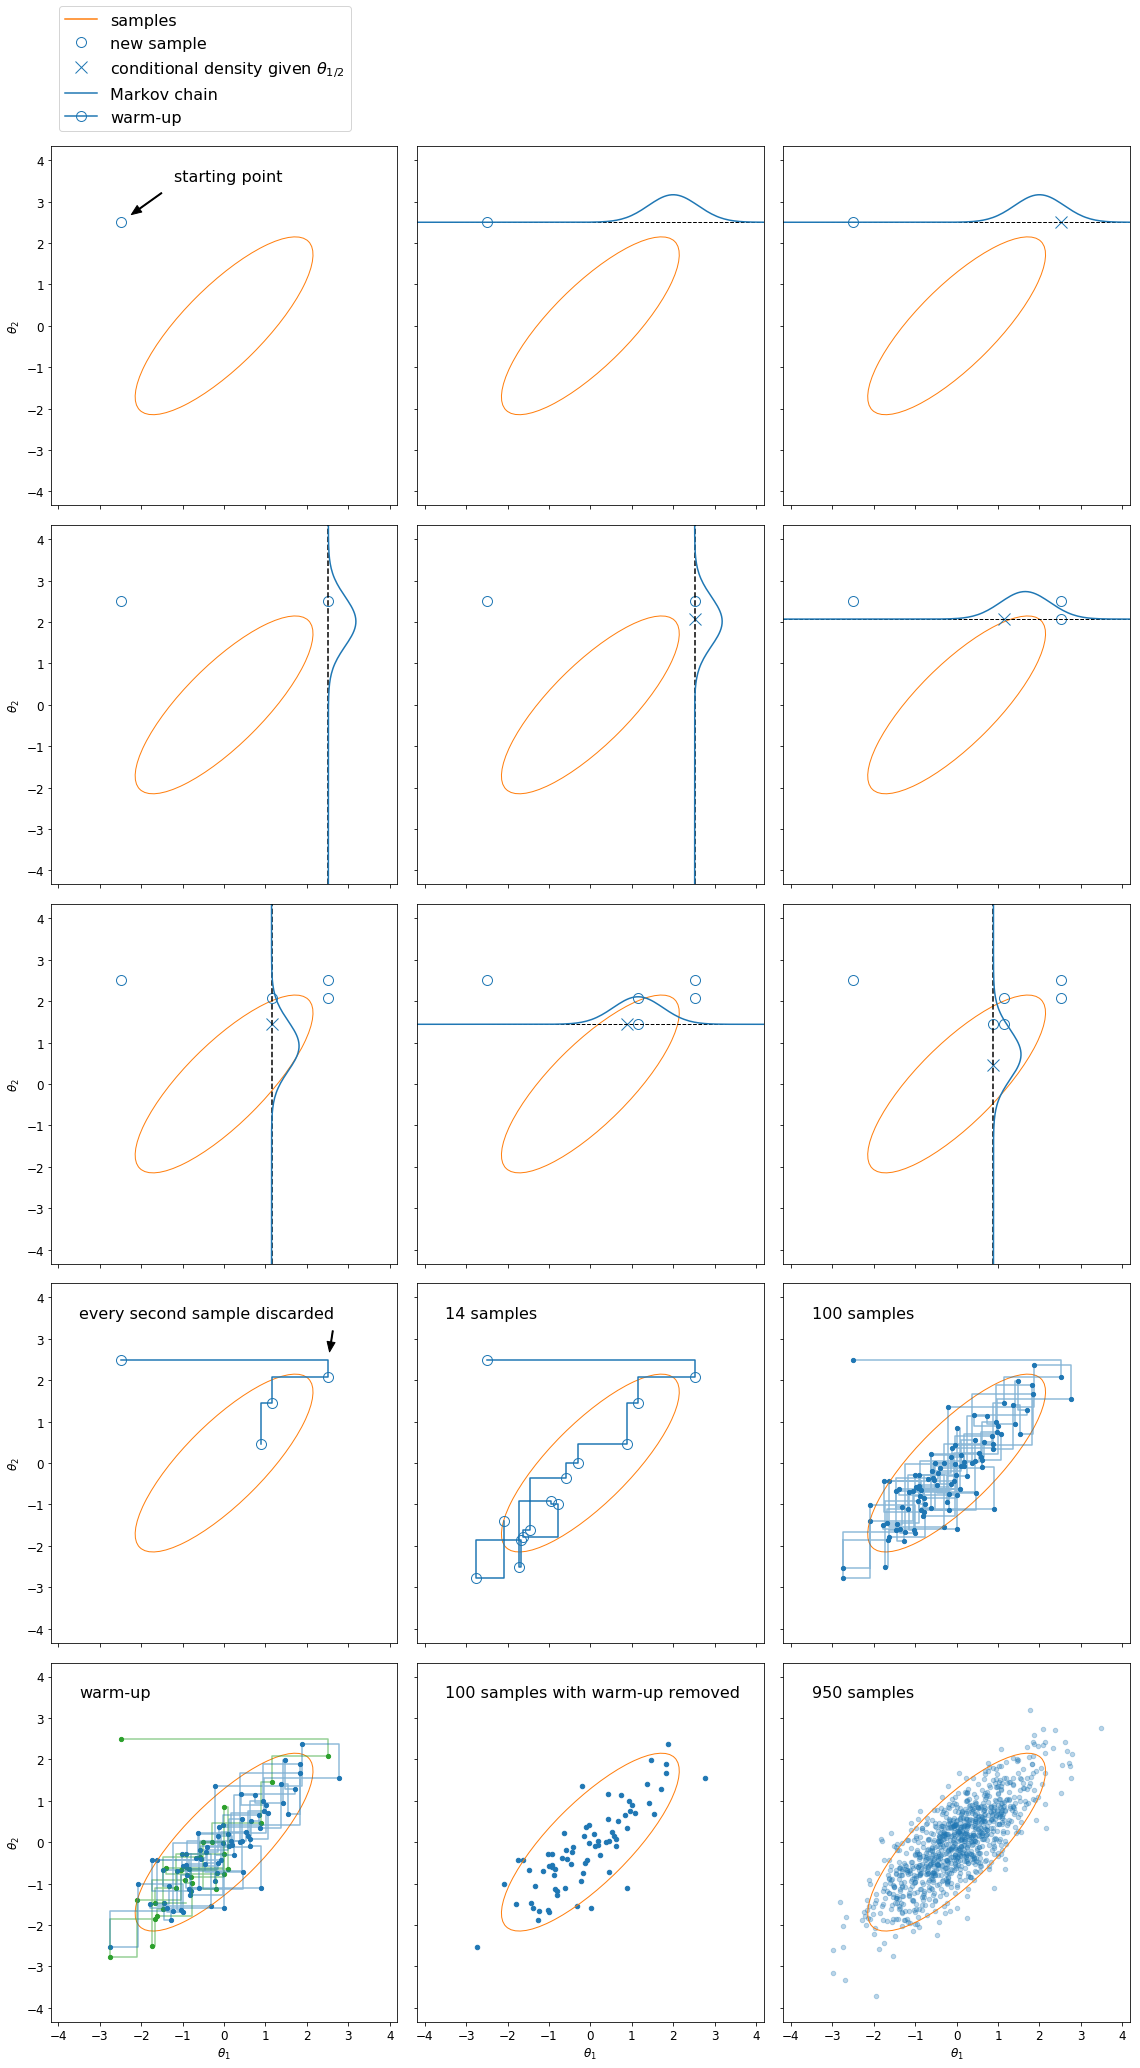

In [7]:
# create the plots
subplotshape = (5, 3)
fig, axes = plt.subplots(
    subplotshape[0], subplotshape[1], sharex=True, sharey=True,
    figsize=(16,27), subplot_kw=dict(aspect='equal')
)

# set limits
axes[0,0].set_xlim([-4.5, 4.5])
axes[0,0].set_ylim([-4.5, 4.5])

# set labels
for i in range(subplotshape[0]):
    axes[i,0].set_ylabel(r'$\theta_2$')
for j in range(subplotshape[1]):
    axes[-1,j].set_xlabel(r'$\theta_1$')

# add shared legend
axes[0,0].legend(
    (   mpl.lines.Line2D([], [], color='C1'), 
        mpl.lines.Line2D(
            [], [], linestyle='', marker='o', markersize=10,
            markerfacecolor='none', markeredgecolor='C0'
        ),
        mpl.lines.Line2D(
            [], [], linestyle='', marker='x', markersize=12,
            markerfacecolor='none', markeredgecolor='C0'
        ),
        mpl.lines.Line2D([], [], color='C0'),
        mpl.lines.Line2D(
            [], [], color='C0', marker='o', markersize=10,
            markerfacecolor='none', markeredgecolor='C0'
        ),
        mpl.lines.Line2D(
            [], [], color='m', marker='o', markersize=10,
            markerfacecolor='none', markeredgecolor='C2'
        )
    ),
    (   'samples',
        'new sample',
        r'conditional density given $\theta_{1/2}$',
        'Markov chain',
        'warm-up'
    ),
    numpoints=1,
    loc='lower left',
    bbox_to_anchor=(0., 1.02, 1., .102),
    fontsize=16
)

ax = axes[0,0]
add90hpd(ax)
ax.plot(
    tt[0,0], tt[0,1], 'o', markersize=10,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.annotate(
    'starting point',
    (tt[0,0], tt[0,1]),
    (-1.2, 3.5),
    arrowprops=dict(
        facecolor='black',
        shrink=0.2,
        width=1,
        headwidth=8,
        headlength=10
    ),
    fontsize=16
)

ax = axes[0,1]
add90hpd(ax)
i = 0
ax.plot(
    tt[:i+1,0], tt[:i+1,1], 'o', markersize=10,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.axhline(y=tt[i,1], linestyle='--', color='k', linewidth=1)
ax.plot(
    Y1,
    tt[i,1] + stats.norm.pdf(
        Y1,
        loc = y1 + r*(tt[i,1] - y2),
        scale = np.sqrt((1 - r**2))
    ),
    color = 'C0'
)

ax = axes[0,2]
add90hpd(ax)
i = 0
ax.plot(
    tt[:i+1,0], tt[:i+1,1], 'o', markersize=10,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.plot(
    tt[i+1,0], tt[i+1,1], 'x', markersize=12,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.axhline(y=tt[i,1], linestyle='--', color='k', linewidth=1)
ax.plot(
    Y1,
    tt[i,1] + stats.norm.pdf(
        Y1,
        loc = y1 + r*(tt[i,1] - y2),
        scale = np.sqrt((1 - r**2))
    ),
    color = 'C0'
)

ax = axes[1,0]
add90hpd(ax)
i = 1
ax.plot(
    tt[:i+1,0], tt[:i+1,1], 'o', markersize=10,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.axvline(x=tt[i,0], linestyle='--', color='k')
ax.plot(
    tt[i,0] + stats.norm.pdf(
        Y2,
        loc = y2 + r*(tt[i,0] - y1),
        scale = np.sqrt((1 - r**2))
    ),
    Y2,
    color = 'C0'
)

ax = axes[1,1]
add90hpd(ax)
i = 1
ax.plot(
    tt[:i+1,0], tt[:i+1,1], 'o', markersize=10,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.plot(
    tt[i+1,0], tt[i+1,1], 'x', markersize=12,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.axvline(x=tt[i,0], linestyle='--', color='k')
ax.plot(
    tt[i,0] + stats.norm.pdf(
        Y2,
        loc = y2 + r*(tt[i,0] - y1),
        scale = np.sqrt((1 - r**2))
    ),
    Y2,
    color = 'C0'
)

ax = axes[1,2]
add90hpd(ax)
i = 2
ax.plot(
    tt[:i+1,0], tt[:i+1,1], 'o', markersize=10,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.plot(
    tt[i+1,0], tt[i+1,1], 'x', markersize=12,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.axhline(y=tt[i,1], linestyle='--', color='k', linewidth=1)
ax.plot(
    Y1,
    tt[i,1] + stats.norm.pdf(
        Y1,
        loc = y1 + r*(tt[i,1] - y2),
        scale = np.sqrt((1 - r**2))
    ),
    color = 'C0'
)

ax = axes[2,0]
add90hpd(ax)
i = 3
ax.plot(
    tt[:i+1,0], tt[:i+1,1], 'o', markersize=10,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.plot(
    tt[i+1,0], tt[i+1,1], 'x', markersize=12,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.axvline(x=tt[i,0], linestyle='--', color='k')
ax.plot(
    tt[i,0] + stats.norm.pdf(
        Y2,
        loc = y2 + r*(tt[i,0] - y1),
        scale = np.sqrt((1 - r**2))
    ),
    Y2,
    color = 'C0'
)

ax = axes[2,1]
add90hpd(ax)
i = 4
ax.plot(
    tt[:i+1,0], tt[:i+1,1], 'o', markersize=10,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.plot(
    tt[i+1,0], tt[i+1,1], 'x', markersize=12,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.axhline(y=tt[i,1], linestyle='--', color='k', linewidth=1)
ax.plot(
    Y1,
    tt[i,1] + stats.norm.pdf(
        Y1,
        loc = y1 + r*(tt[i,1] - y2),
        scale = np.sqrt((1 - r**2))
    ),
    color = 'C0'
)

ax = axes[2,2]
add90hpd(ax)
i = 5
ax.plot(
    tt[:i+1,0], tt[:i+1,1], 'o', markersize=10,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.plot(
    tt[i+1,0], tt[i+1,1], 'x', markersize=12,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.axvline(x=tt[i,0], linestyle='--', color='k')
ax.plot(
    tt[i,0] + stats.norm.pdf(
        Y2,
        loc = y2 + r*(tt[i,0] - y1),
        scale = np.sqrt((1 - r**2))
    ),
    Y2,
    color = 'C0'
)

ax = axes[3,0]
add90hpd(ax)
i = 6
line, = ax.plot(tt[:i+1,0], tt[:i+1,1], color='C0')
line, = ax.plot(
    tt[:i+1:2,0], tt[:i+1:2,1], 'o', markersize=10,
    markerfacecolor='none', markeredgecolor='C0')
ax.annotate(
    'every second sample discarded',
    (tt[1,0], tt[1,1]),
    (-3.5, 3.5),
    arrowprops=dict(
        facecolor='black',
        shrink=0.2,
        width=1,
        headwidth=8,
        headlength=10
    ),
    fontsize=16
)

ax = axes[3,1]
add90hpd(ax)
i = 26
ax.plot(tt[:i+1,0], tt[:i+1,1], color='C0')
ax.plot(
    tt[:i+1:2,0], tt[:i+1:2,1], 'o', markersize=10,
    markerfacecolor='none', markeredgecolor='C0'
)
ax.text(-3.5, 3.5, '14 samples', fontsize=16)

ax = axes[3,2]
add90hpd(ax)
i = 198
ax.plot(tt[:i+1,0], tt[:i+1,1], color='C0', alpha=0.5)
ax.scatter(tt[:i+1:2,0], tt[:i+1:2,1], 18, color='C0')
ax.text(-3.5, 3.5, '100 samples', fontsize=16)

ax = axes[4,0]
add90hpd(ax)
i = 198
ax.plot(tt[:burnin,0], tt[:burnin,1], color='C2', alpha=0.5)
ax.scatter(tt[:burnin:2,0], tt[:burnin:2,1], 18, color='C2')
ax.plot(
    tt[burnin:i+1,0], tt[burnin:i+1,1], color='C0',
    alpha=0.5
)
ax.scatter(
    tt[burnin:i+1:2,0], tt[burnin:i+1:2,1],
    18, color='C0'
)
ax.text(-3.5, 3.5, 'warm-up', fontsize=16)

ax = axes[4,1]
add90hpd(ax)
i = 198
ax.scatter(
    tt[burnin:i+1:2,0], tt[burnin:i+1:2,1],
    20, color='C0'
)
ax.text(-3.5, 3.5, '100 samples with warm-up removed', fontsize=16)

ax = axes[4,2]
add90hpd(ax)
ax.scatter(
    tt[burnin::2,0], tt[burnin::2,1], 20,
    color='C0', alpha=0.3
)
ax.text(-3.5, 3.5, '950 samples', fontsize=16)

fig.tight_layout()

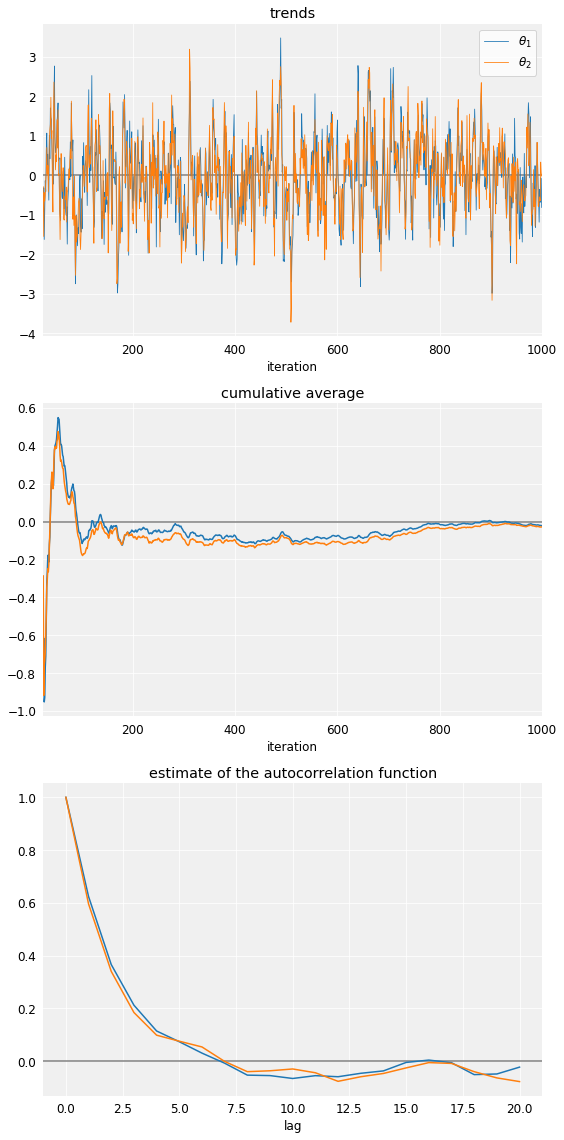

In [8]:
plt.style.use(plot_tools.custom_styles['gray_background'])

fig = plt.figure(figsize=(8, 16))

indexes = np.arange(burnin, M, 2)
samps = tt[indexes]

ax1 = fig.add_subplot(3, 1, 1)
ax1.axhline(y=0, color='gray')
line1, line2, = ax1.plot(indexes/2, samps, linewidth=0.8)
ax1.legend((line1, line2), (r'$\theta_1$', r'$\theta_2$'))
ax1.set_xlabel('iteration')
ax1.set_title('trends')
ax1.set_xlim([burnin/2, 1000])

ax2 = fig.add_subplot(3, 1, 2)
ax2.axhline(y=0, color='gray')
ax2.plot(
    indexes/2,
    np.cumsum(samps, axis=0)/np.arange(1,len(samps)+1)[:,None]
)
ax2.set_xlabel('iteration')
ax2.set_title('cumulative average')
ax2.set_xlim([burnin/2, 1000])

ax3 = fig.add_subplot(3, 1, 3)
maxlag = 20
sampsc = samps - np.mean(samps, axis=0)
acorlags = np.arange(maxlag+1)
ax3.axhline(y=0, color='gray')
for i in [0,1]:
    t = np.correlate(sampsc[:,i], sampsc[:,i], 'full')
    t = t[-len(sampsc):-len(sampsc)+maxlag+1] / t[-len(sampsc)]
    ax3.plot(acorlags, t)
ax3.set_xlabel('lag')
ax3.set_title('estimate of the autocorrelation function')

fig.tight_layout()

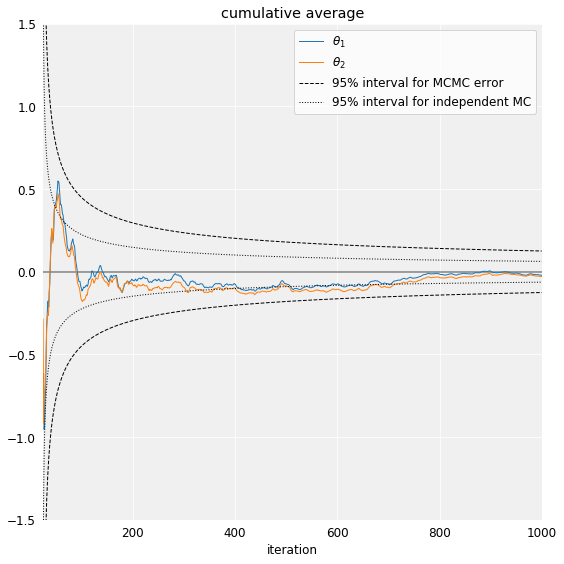

In [9]:
fig = plt.figure(figsize=(8, 8))

indexes = np.arange(burnin, M, 2)
samps = tt[indexes]
nsamps = np.arange(1, len(samps)+1)

ax1 = fig.add_subplot(1, 1, 1)
ax1.axhline(y=0, color='gray')
line1, line2, = ax1.plot(
    indexes/2,
    np.cumsum(samps, axis=0) / nsamps[:,None],
    linewidth=1
)
er1, = ax1.plot(
    indexes/2, 1.96/np.sqrt(nsamps/4), 'k--', linewidth=1)
ax1.plot(indexes/2, -1.96/np.sqrt(nsamps/4), 'k--', linewidth=1)
er2, = ax1.plot(
    indexes/2, 1.96/np.sqrt(nsamps), 'k:', linewidth=1)
ax1.plot(indexes/2, -1.96/np.sqrt(nsamps), 'k:', linewidth=1)
ax1.set_xlabel('iteration')
ax1.set_title('cumulative average')
ax1.legend(
    (line1, line2, er1, er2),
    (r'$\theta_1$', r'$\theta_2$',
      '95% interval for MCMC error',
      '95% interval for independent MC'
    )
)
ax1.set_xlim([burnin/2, 1000])
ax1.set_ylim([-1.5, 1.5])

fig.tight_layout()